# 3.1 Bootstrapping para el intervalo de confianza

Formar submuestras aleatorias con reemplazo

In [3]:
import pandas as pd
import numpy as np


In [4]:
data = pd.Series([
    10.7,  9.58,  7.74,  8.3 , 11.82,  9.74, 10.18,  8.43,  8.71,
     6.84,  9.26, 11.61, 11.08,  8.94,  8.44, 10.41,  9.36, 10.85,
    10.41,  8.37,  8.99, 10.17,  7.78, 10.79, 10.61, 10.87,  7.43,
     8.44,  9.44,  8.26,  7.98, 11.27, 11.61,  9.84, 12.47,  7.8,
    10.54,  8.99,  7.33,  8.55,  8.06, 10.62, 10.41,  9.29,  9.98,
     9.46,  9.99,  8.62, 11.34, 11.21, 15.19, 20.85, 19.15, 19.01,
    15.24, 16.66, 17.62, 18.22, 17.2, 15.76, 16.89, 15.22, 18.7,
    14.84, 14.88, 19.41, 18.54, 17.85, 18.31, 13.68, 18.46, 13.99,
    16.38, 16.88, 17.82, 15.17, 15.16, 18.15, 15.08, 15.91, 16.82,
    16.85, 18.04, 17.51, 18.44, 15.33, 16.07, 17.22, 15.9, 18.03,
    17.26, 17.6, 16.77, 17.45, 13.73, 14.95, 15.57, 19.19, 14.39,
    15.76]) 


for i in range(5):
    # extrae un elemento aleatorio de la muestra 1
    # especifica random_state para su reproducción
    print(data.sample(1, random_state=12345)) 

69    13.68
dtype: float64
69    13.68
dtype: float64
69    13.68
dtype: float64
69    13.68
dtype: float64
69    13.68
dtype: float64


Como especificamos el random_state, el elemento aleatorio es siempre el mismo. Para solucionarlo:
-  crea una instancia RandomState() del módulo numpy.random:
-  se pasa al argumento random_state de cualquier función.
-  selección de elementos con reemplazo

Es importante que con cada nueva llamada, su estado cambie a aleatorio para obtener diferentes submuestra.

In [5]:
from numpy.random import RandomState

state = RandomState(12345) #instancia con Random_State de numpy.random

In [6]:
for i in range(5):
    # extrae un elemento aleatorio de la muestra 1 con reemplazo
    print(data.sample(1,  random_state=state)) 

69    13.68
dtype: float64
27    8.44
dtype: float64
36    10.54
dtype: float64
84    18.44
dtype: float64
59    15.76
dtype: float64


In [7]:
example_data = pd.Series([1, 2, 3, 4, 5])
print('Sin reemplazo')
print(example_data.sample(frac=1, replace=False, random_state=state))
print('Con reemplazo')
print(example_data.sample(frac=1, replace=True, random_state=state)) 

Sin reemplazo
2    3
0    1
3    4
1    2
4    5
dtype: int64
Con reemplazo
0    1
1    2
1    2
3    4
1    2
dtype: int64


1.
Utilizando la técnica del bootstrapping, 
- crea 10 submuestras 
- un cuantil del 99 % para cada una de ellas. 

Imprímelas en la pantalla utilizando el string break.
Comprueba la función quantile() para las instancias pandas.Series.

In [8]:
import pandas as pd
import numpy as np

data = pd.Series([
    10.7 ,  9.58,  7.74,  8.3 , 11.82,  9.74, 10.18,  8.43,  8.71,
     6.84,  9.26, 11.61, 11.08,  8.94,  8.44, 10.41,  9.36, 10.85,
    10.41,  8.37,  8.99, 10.17,  7.78, 10.79, 10.61, 10.87,  7.43,
     8.44,  9.44,  8.26,  7.98, 11.27, 11.61,  9.84, 12.47,  7.8 ,
    10.54,  8.99,  7.33,  8.55,  8.06, 10.62, 10.41,  9.29,  9.98,
     9.46,  9.99,  8.62, 11.34, 11.21, 15.19, 20.85, 19.15, 19.01,
    15.24, 16.66, 17.62, 18.22, 17.2 , 15.76, 16.89, 15.22, 18.7 ,
    14.84, 14.88, 19.41, 18.54, 17.85, 18.31, 13.68, 18.46, 13.99,
    16.38, 16.88, 17.82, 15.17, 15.16, 18.15, 15.08, 15.91, 16.82,
    16.85, 18.04, 17.51, 18.44, 15.33, 16.07, 17.22, 15.9 , 18.03,
    17.26, 17.6 , 16.77, 17.45, 13.73, 14.95, 15.57, 19.19, 14.39,
    15.76])

state = np.random.RandomState(12345)

for i in range(10):
    subsample = data.sample(frac=1,replace=True,random_state=state)
    print(subsample.quantile(0.99))

19.192200000000003
20.85
19.20660000000001
19.028400000000012
19.42440000000001
19.42440000000001
20.85
19.42440000000001
19.42440000000001
19.19


2.
Utilizando la técnica del bootstrapping:
- encuentra el intervalo de confianza del 90 % para el cuantil del 99 %. 
- Guarda su valor más bajo en la variable lower, y el valor más alto en la variable upper.
- Imprímelos (en el precódigo).
- Llama a la función quantile() dos veces: 
    - primero, para obtener el cuantil del 99 % de cada submuestra, 
    - y luego, para obtener el intervalo de confianza.

In [10]:
import pandas as pd
import numpy as np

data = pd.Series([
    10.7 ,  9.58,  7.74,  8.3 , 11.82,  9.74, 10.18,  8.43,  8.71,
     6.84,  9.26, 11.61, 11.08,  8.94,  8.44, 10.41,  9.36, 10.85,
    10.41,  8.37,  8.99, 10.17,  7.78, 10.79, 10.61, 10.87,  7.43,
     8.44,  9.44,  8.26,  7.98, 11.27, 11.61,  9.84, 12.47,  7.8 ,
    10.54,  8.99,  7.33,  8.55,  8.06, 10.62, 10.41,  9.29,  9.98,
     9.46,  9.99,  8.62, 11.34, 11.21, 15.19, 20.85, 19.15, 19.01,
    15.24, 16.66, 17.62, 18.22, 17.2 , 15.76, 16.89, 15.22, 18.7 ,
    14.84, 14.88, 19.41, 18.54, 17.85, 18.31, 13.68, 18.46, 13.99,
    16.38, 16.88, 17.82, 15.17, 15.16, 18.15, 15.08, 15.91, 16.82,
    16.85, 18.04, 17.51, 18.44, 15.33, 16.07, 17.22, 15.9 , 18.03,
    17.26, 17.6 , 16.77, 17.45, 13.73, 14.95, 15.57, 19.19, 14.39,
    15.76])

state = np.random.RandomState(12345)

# Se obtiene el cuantil 99% para cada submuestra

for i in range(1000):  # Guarda los valores del cuantil del 99 % en la variable de valores
    values = []   
    subsample = data.sample(frac=1, replace=True, random_state=state)
    values.append(subsample.quantile(0.99))

values=pd.Series(values)

#Se obtiene el intervalo de confianza
lower =values.quantile(0.05) #cuantil del 99
upper =values.quantile(.95)

print(lower)
print(upper)

18.7031
18.7031


# 3.2 Bootstrapping para el análisis de pruebas A/B



- Analiza las dos muestras y comprueba la hipótesis que dice que el importe promedio de compra ha aumentado. 
- Guarda la diferencia entre los importes promedio de compra en la variable AB_difference 
- Asigna un nivel de significación del 5 % (.05) a la variable alpha. 
- Guarda el valor p en la variable pvalue e imprímelo. 
- Imprime el resultado de la prueba de hipótesis.

In [16]:
import pandas as pd
import numpy as np
from scipy import stats as st

# datos del grupo de control A
samples_A = pd.Series([
     98.24,  97.77,  95.56,  99.49, 101.4 , 105.35,  95.83,  93.02,
    101.37,  95.66,  98.34, 100.75, 104.93,  97.  ,  95.46, 100.03,
    102.34,  98.23,  97.05,  97.76,  98.63,  98.82,  99.51,  99.31,
     98.58,  96.84,  93.71, 101.38, 100.6 , 103.68, 104.78, 101.51,
    100.89, 102.27,  99.87,  94.83,  95.95, 105.2 ,  97.  ,  95.54,
     98.38,  99.81, 103.34, 101.14, 102.19,  94.77,  94.74,  99.56,
    102.  , 100.95, 102.19, 103.75, 103.65,  95.07, 103.53, 100.42,
     98.09,  94.86, 101.47, 103.07, 100.15, 100.32, 100.89, 101.23,
     95.95, 103.69, 100.09,  96.28,  96.11,  97.63,  99.45, 100.81,
    102.18,  94.92,  98.89, 101.48, 101.29,  94.43, 101.55,  95.85,
    100.16,  97.49, 105.17, 104.83, 101.9 , 100.56, 104.91,  94.17,
    103.48, 100.55, 102.66, 100.62,  96.93, 102.67, 101.27,  98.56,
    102.41, 100.69,  99.67, 100.99])

# datos del grupo experimental B
samples_B = pd.Series([
    101.67, 102.27,  97.01, 103.46, 100.76, 101.19,  99.11,  97.59,
    101.01, 101.45,  94.8 , 101.55,  96.38,  99.03, 102.83,  97.32,
     98.25,  97.17, 101.1 , 102.57, 104.59, 105.63,  98.93, 103.87,
     98.48, 101.14, 102.24,  98.55, 105.61, 100.06,  99.  , 102.53,
    101.56, 102.68, 103.26,  96.62,  99.48, 107.6 ,  99.87, 103.58,
    105.05, 105.69,  94.52,  99.51,  99.81,  99.44,  97.35, 102.97,
     99.77,  99.59, 102.12, 104.29,  98.31,  98.83,  96.83,  99.2 ,
     97.88, 102.34, 102.04,  99.88,  99.69, 103.43, 100.71,  92.71,
     99.99,  99.39,  99.19,  99.29, 100.34, 101.08, 100.29,  93.83,
    103.63,  98.88, 105.36, 101.82, 100.86, 100.75,  99.4 ,  95.37,
    107.96,  97.69, 102.17,  99.41,  98.97,  97.96,  98.31,  97.09,
    103.92, 100.98, 102.76,  98.24,  97.  ,  98.99, 103.54,  99.72,
    101.62, 100.62, 102.79, 104.19])

# diferencia real entre las medias de los grupos
AB_difference = samples_B.mean()-samples_A.mean()
print("Diferencia entre los importes promedios de compra:", AB_difference)

alpha = .05
    
bootstrap_samples = 1000
count = 0
for i in range(bootstrap_samples):
    # concatena las muestras
    united_samples = pd.concat([samples_A,samples_B])

    # crea una submuestra
    subsample = united_samples.sample(frac=1, replace=True, random_state= state)
    
    # divide la submuestra por la mitad
    subsample_A = subsample[:len(samples_A)]
    subsample_B = subsample[len(samples_B):]

    # encuentra la diferencia entre las medias
    bootstrap_difference = subsample_B.mean() - subsample_A.mean()
    
    # si la diferencia no es menor que la diferencia real, añade "1" al contador
    if bootstrap_difference >= AB_difference:
        count += 1

# el valor p es igual al porcentaje de valores excedentes
pvalue = 1. * count / bootstrap_samples
print('p-value =', pvalue)

if pvalue < alpha:
    print("La hipótesis nula se rechaza, a saber, es probable que el importe promedio de las compras aumente")
else:
    print("La hipótesis nula no se rechaza, a saber, es poco probable que el importe medio de las compras aumente")
    

Diferencia entre los importes promedios de compra: 0.7682000000000357
p-value = 0.029
La hipótesis nula se rechaza, a saber, es probable que el importe promedio de las compras aumente


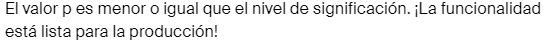

# Bootstrapping para modelos

 bootstrapping para evaluar los intervalos de confianza en los modelos de ML.

Channel Tunnel es una escuela de francés que ofrece clases exprés de francés a un precio razonable. Está en el proceso de desarrollo de un modelo que determine la probabilidad de que un alumno asista o no a una clase. Diariamente se reciben muchas solicitudes. La prioridad se asigna por orden de solicitud, o sea, la primera en llegar, será la primera en ser atendida. Aproximadamente la mitad de quienes solicitan una clase, no se presentan y no la pagan. La dirección de la escuela ha decidido impartir clases solo a estudiantes con mayor probabilidad de asistir a clase. Debido a los posibles riesgos para su reputación, la empresa introducirá el nuevo sistema únicamente a condición de que se demuestre el aumento de los ingresos. 

Para tomar la decisión correcta, hay que evaluar la distribución de probabilidad de los ingresos.
Aquí tienes las condiciones importantes para la tarea:

- El modelo de predicción de la probabilidad de asistencia a clase ya está entrenado. 
- Las predicciones se encuentran en el archivo eng_probabilities.csv, y las respuestas correctas en eng_target.csv.
- El coste de una lección es de 10 dólares. Se pueden programar hasta 10 lecciones por día.
- Los ingresos diarios actuales ascienden a 50 dólares (la mitad de los estudiantes cancelan la lección).
- La media diaria de solicitudes recibidas es de 25.
- Los ingresos objetivo para la implementación del nuevo sistema son de 75 dólares. 
- Su probabilidad debe ser de al menos el 99 %


1.
Escribe la función revenue() que calcula y devuelve el valor de los ingresos.
- Esta función utiliza:
                - la lista de respuestas (target): si el estudiante asistirá a la clase

                - la lista de probabilidades (probabilities): el modelo evalúa si el estudiante asistirá o no
                
                - el número de estudiantes que asisten a las clases por día (count).

La función debe seleccionar a los estudiantes con mayor probabilidad de asistir a clase y, basándose en las respuestas, calcular los posibles ingresos. Ten en cuenta que la función toma series de datos así que no es necesario utilizar ningún dataset para esta tarea.

En el precódigo tenemos un ejemplo de ejecución de la función en el que las listas de respuestas y probabilidades son cortas y el número de estudiantes es solo de 3.

In [17]:
import pandas as pd

# lista de respuestas (target): si el estudiante asistirá a la clase
# lista de probabilidades (probabilities): el modelo evalúa si el estudiante asistirá o no
# número de estudiantes que asisten a las clases por día (count).

def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False) 
    selected = target[probs_sorted.index][:count] 
    return 10 * selected.sum()
    
#En el precódigo tenemos un ejemplo de ejecución de la función 
# en el que las listas de respuestas y probabilidades son cortas y 
# el número de estudiantes es solo de 3.

target = pd.Series([1,   1,   0,   0,  1,    0])
probab = pd.Series([0.2, 0.9, 0.8, 0.3, 0.5, 0.1])

res = revenue(target, probab, 3) # 3 estudiantes

print(res)

20


2.
Para encontrar el cuantil de ingresos del 1 %, realiza el proceso de bootstrapping con 1000 repeticiones.
Guarda la lista de estimaciones del bootstrapping en la variable values y el cuantil del 1 % en la variable lower. Imprime los ingresos promedio y el cuantil del 1 % (en precódigo)

In [23]:
import pandas as pd
import numpy as np

# Abre los archivos
# toma el índice “0” para convertir los datos a pd-Series
target = pd.read_csv('datasets/eng_target.csv')['0']
probabilities = pd.read_csv('datasets/eng_probabilites.csv')['0']

def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return 10 * selected.sum()

state = np.random.RandomState(12345)
    
values = []
for i in range(1000):

    target_subsample= target.sample(n=25, replace=True,random_state=state)
    probs_subsample=probabilities[target_subsample.index]
    
    values.append(revenue(target_subsample,probs_subsample,10))

values = pd.Series(values)
lower = values.quantile(.01)

mean = values.mean()
print("Ingresos promedio:", mean)
print("Cuantil del 1 %:", lower)

Ingresos promedio: 91.67
Cuantil del 1 %: 60.0


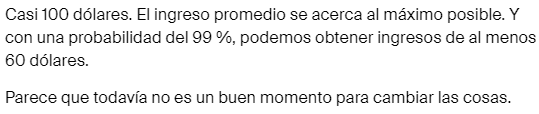